In [1]:
#pip install datasets
#pip install keybert

In [2]:
import pandas as pd
import json
import datasets
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
# get the dataset only for keyphrase generation
dataset = load_dataset("midas/duc2001", "generation")

Found cached dataset duc2001 (C:/Users/Alicia/.cache/huggingface/datasets/midas___duc2001/generation/0.0.1/7888b46165d8a58f49f00e28410b46b1f22fabfd72a9e89f3e80a4e2d27e4a9b)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
def drop_column(dataset):
    del dataset['abstractive_keyphrases']
    return dataset

# Para eliminar la columna que no necesitamos
dataset = dataset.map(drop_column)

Loading cached processed dataset at C:\Users\Alicia\.cache\huggingface\datasets\midas___duc2001\generation\0.0.1\7888b46165d8a58f49f00e28410b46b1f22fabfd72a9e89f3e80a4e2d27e4a9b\cache-16ebf8679ee254b4.arrow


Hasta aquí tenemos un dataset con las 3 columnas de interés:

In [5]:
dataset

DatasetDict({
    test: Dataset({
        features: ['id', 'document', 'extractive_keyphrases'],
        num_rows: 308
    })
})

Guardo en una lista las extractive keyphrases del dataset

In [5]:
# Crear una lista de sublistas
extractive_keyphrases_list = []

for element in dataset['test']:
    # Acceder a la lista de extractive_keyphrases para cada elemento
    extractive_keyphrases = element['extractive_keyphrases']
    
    # Añadir la lista de extractive_keyphrases a la lista de sublistas
    extractive_keyphrases_list.append(extractive_keyphrases)
    
print(len(extractive_keyphrases_list))
#print(extractive_keyphrases_list)

308


In [6]:
# guardar el numero de extractive keyphrases que hay para cada doc 

n_extractive_keyphrases = []
for sublista in extractive_keyphrases_list:
    num_elementos = len(sublista)
    n_extractive_keyphrases.append(num_elementos)

#print(n_extractive_keyphrases)

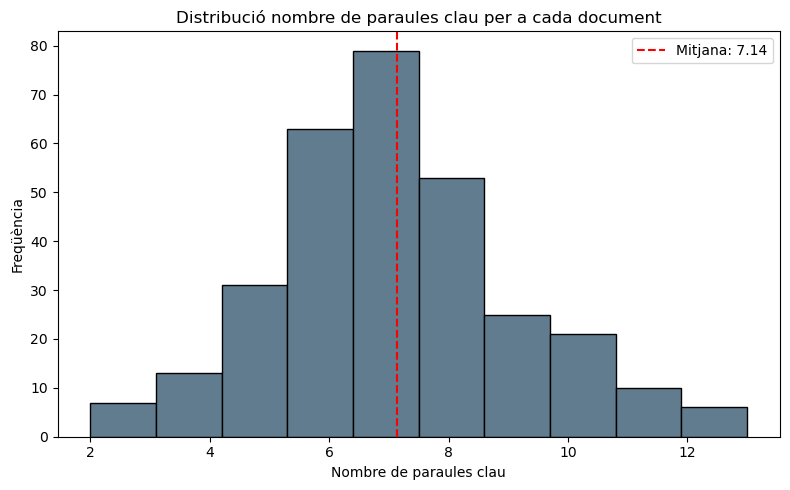

In [7]:
# Crear histograma
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(n_extractive_keyphrases, edgecolor='black', color='#607c8e')

# Calcular la media
mean_value = np.mean(n_extractive_keyphrases)

# Agregar línea vertical para la media
ax.axvline(x=mean_value, color='red', linestyle='--', label=f'Mitjana: {mean_value:.2f}')

# Agregar título y etiquetas de eje
ax.set_title('Distribució nombre de paraules clau per a cada document')
ax.set_xlabel('Nombre de paraules clau')
ax.set_ylabel('Freqüència')

# Agregar leyenda
ax.legend()

# Ajustar espaciado
fig.tight_layout()

# Mostrar el histograma
plt.show()


In [8]:
ngram_extractive_keyphrases = [] # numero de ngramas de cada keyphrase
for sublista in extractive_keyphrases_list:
    n_palabras_elementos = []
    for elemento in sublista:
        n_palabras = len(elemento.split())
        n_palabras_elementos.append(n_palabras)
    ngram_extractive_keyphrases.append(n_palabras_elementos)
    
#print(ngram_extractive_keyphrases)

ngram_extractive_keyphrases_list = list(itertools.chain.from_iterable(ngram_extractive_keyphrases))
#print(ngram_extractive_keyphrases_list) # las juntamos que queden en una sola lista para hacer el histograma


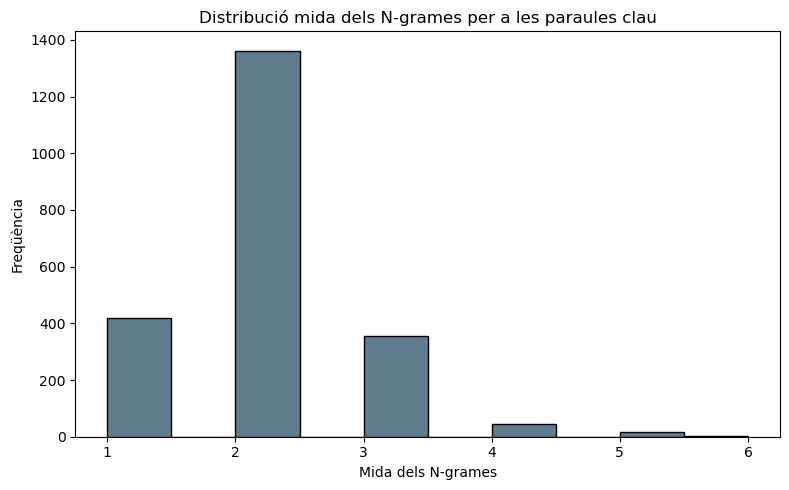

In [9]:
# Crear histograma
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(ngram_extractive_keyphrases_list, edgecolor='black', color='#607c8e')

# Agregar título y etiquetas de eje
ax.set_title('Distribució mida dels N-grames per a les paraules clau')
ax.set_xlabel('Mida dels N-grames')
ax.set_ylabel('Freqüència')

# Ajustar espaciado
fig.tight_layout()

# Mostrar el histograma
plt.show()
